# USAID FUNDING SENTIMENTAL ANALYSIS

## Merging the Reddit dataset

In [163]:

import os
import glob
import pandas as pd

# Path to your directory containing the CSV files
path = r'C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\USAID-Kenya-Sentiment-Analysis\data\raw\reddit_data'  

# Get a list of all .csv files in the directory
ruth_reddit_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine them into a single DataFrame
dfs = []
for filename in ruth_reddit_files:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all into one big DataFrame
ruth_reddt_final= pd.concat(dfs, ignore_index=True)

# Inspect the combined dataset
ruth_reddt_final.head()


,title,selftext,subreddit,author,created_utc,url,score,num_comments,keyword,text,date_posted,upvotes,comments,permalink,search_term,created_date,created,Unnamed: 0
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,Kenya,muerki,2025-04-15 13:16:53,https://www.reddit.com/r/Kenya/comments/1jzrn2...,3.0,5.0,usaid kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,Kenya,Morio_anzenza,2025-04-07 04:21:12,https://www.reddit.com/r/Kenya/comments/1jtcvb...,169.0,95.0,usaid kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,Kenya,vindtar,2025-04-05 19:09:10,https://www.reddit.com/r/Kenya/comments/1jsb14...,2.0,2.0,usaid kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",Kenya,Gold_Smart,2025-03-25 08:18:04,https://www.reddit.com/r/Kenya/comments/1jjehw...,13.0,20.0,usaid kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,Kenya,westmaxia,2025-03-08 08:08:58,https://www.reddit.com/r/Kenya/comments/1j6cjz...,1.0,6.0,usaid kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#listing numbe of rows and columns
rows, columns = ruth_reddt_final.shape

print(f'number of rows = {rows}')
print(f'number of rows = {columns}')

number of rows = 1289
number of rows = 18


In [165]:
#listing columns in the dataset
ruth_reddt_final.columns

Index(['title', 'selftext', 'subreddit', 'author', 'created_utc', 'url',
       'score', 'num_comments', 'keyword', 'text', 'date_posted', 'upvotes',
       'comments', 'permalink', 'search_term', 'created_date', 'created',
       'Unnamed: 0'],
      dtype='object')

In [166]:
ruth_reddt_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1289 non-null   object 
 1   selftext      624 non-null    object 
 2   subreddit     1289 non-null   object 
 3   author        466 non-null    object 
 4   created_utc   833 non-null    object 
 5   url           1289 non-null   object 
 6   score         1013 non-null   float64
 7   num_comments  833 non-null    float64
 8   keyword       742 non-null    object 
 9   text          277 non-null    object 
 10  date_posted   276 non-null    object 
 11  upvotes       276 non-null    float64
 12  comments      276 non-null    float64
 13  permalink     426 non-null    object 
 14  search_term   150 non-null    object 
 15  created_date  150 non-null    object 
 16  created       180 non-null    object 
 17  Unnamed: 0    200 non-null    float64
dtypes: float64(5), object(13)
me

In [167]:
#deleting unnecessary cols
ruth_reddt_final.drop(columns=['subreddit', 'author','url',
       'score', 'num_comments', 'keyword', 'upvotes',
       'comments', 'permalink', 'search_term',
       'Unnamed: 0'],inplace=True)

In [168]:
ruth_reddt_final.sample(n=5)

,title,selftext,created_utc,text,date_posted,created_date,created
92,Foreign policy under kasongo,Kenya's diplomatic standing is taking hit afte...,2025-02-18 11:21:10,NaN,NaN,NaN,NaN
357,Kwani kenyans support Democrats?,Somebody wrote this on the USAID situation and...,2025-02-07 10:14:35,NaN,NaN,NaN,NaN
227,Kenyans in Diaspora,I have recently been digging into challenges t...,2025-06-03 13:43:38,NaN,NaN,NaN,NaN
690,Stop-Work Order on US Foreign Aid Puts China F...,NaN,NaN,NaN,2025-01-27,NaN,NaN
1065,Watchdog Tries to Verify Coordinates of Afghan...,NaN,NaN,NaN,NaN,NaN,2015-07-01 21:28:37


In [169]:

# # Example dataset
# # df = pd.read_csv('your_file.csv')

# # Combine into one column
# ruth_reddt_final["date"] = ruth_reddt_final["created_date"].combine_first(ruth_reddt_final["date_posted"])\
#                                .combine_first(ruth_reddt_final["created_utc"])\
#                                .combine_first(ruth_reddt_final["created"])
# # Drop the original columns if you want
# ruth_reddt_final.drop(["created_utc","date_posted", "created_date", "created"], axis=1, inplace=True)

# # Inspect
# ruth_reddt_final.head()


In [170]:
ruth_reddt_final.columns

Index(['title', 'selftext', 'created_utc', 'text', 'date_posted',
       'created_date', 'created'],
      dtype='object')

### Dropping unnecessary cols to work with a narrower dataset

In [171]:
#dropping unnecessary columns
ruth_reddt_final.drop(columns=['created_utc', 'date_posted',
       'created_date', 'created'],inplace=True)

ruth_reddt_final.head()

,title,selftext,text
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,NaN
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,NaN
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,NaN
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",NaN
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,NaN


### Getting the number of empty values in both text and selftext them filling the col with less empty values 

In [172]:
#Number of empty values in text col
print(f'The number of empty values in txt cols is:\n')
print(ruth_reddt_final['text'].isnull().sum())

The number of empty values in txt cols is:

1012


In [173]:
#Number of empty values in selftxt col
print(f'The number of empty values in txt cols is:\n')
print(ruth_reddt_final['selftext'].isnull().sum())

The number of empty values in txt cols is:

665


#### Replacing the empty values in the selftext with the correcsponding values in the text col

In [174]:
# Now since selftext has less values, we will proceed and fill this cells with values from the txt col
# Fill selftext with text where selftext is NaN
ruth_reddt_final["selftext"] = ruth_reddt_final["selftext"].fillna(ruth_reddt_final["text"])

In [175]:
#checking now for the number of empty values in the selftxt

#Number of empty values in selftxt col
print(f'The number of empty values in txt cols is:\n')
print(ruth_reddt_final['selftext'].isnull().sum())

The number of empty values in txt cols is:

388


The number of empty value has reduced from 665 to 338

### Dropping the Txt col since now it has more empty values

In [176]:
# drppoing the text col
ruth_reddt_final.drop(columns='text', inplace=True)

ruth_reddt_final.head()

,title,selftext
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's..."
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...


#### Case conversion for col headers

In [177]:
ruth_reddt_final.rename(columns={'title': 'Title', 'selftext': 'Selftext'}, inplace=True)

ruth_reddt_final.head()


,Title,Selftext
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's..."
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...


In [178]:
#### Final summary of the dataset

ruth_reddt_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1289 non-null   object
 1   Selftext  901 non-null    object
dtypes: object(2)
memory usage: 20.3+ KB


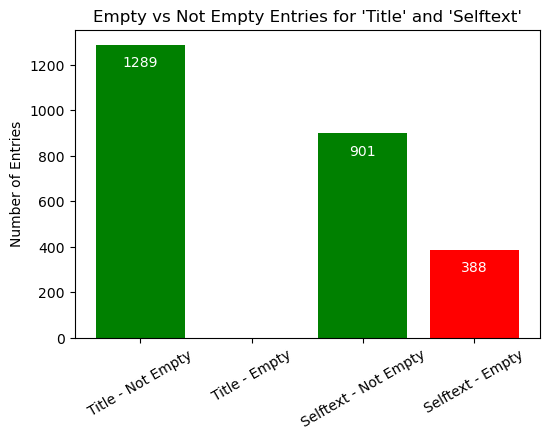

In [179]:
import matplotlib.pyplot as plt

# Count empty and not empty values for both columns
title_empty = ruth_reddt_final["Title"].isnull().sum()
title_not_empty = ruth_reddt_final["Title"].notnull().sum()

selftext_empty = ruth_reddt_final["Selftext"].isnull().sum()
selftext_not_empty = ruth_reddt_final["Selftext"].notnull().sum()

# Prepare the data
categories = ["Title - Not Empty", "Title - Empty",
              "Selftext - Not Empty", "Selftext - Empty"]
values = [title_not_empty, title_empty,
          selftext_not_empty, selftext_empty]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, color=["green", "red", "green", "red"])
plt.ylabel("Number of Entries")
plt.title("Empty vs Not Empty Entries for 'Title' and 'Selftext'")
plt.xticks(rotation=30)

# Adding labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height-50, str(height),
             ha='center', va='top', fontsize=10, color="white")

plt.show()


In [191]:
ruth_reddt_final.to_csv(r"C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\USAID-Kenya-Sentiment-Analysis\data\processed\Kitasi_merged_reddit.csv")

## Merging the News dataset

In [162]:

import os
import glob
import pandas as pd

# Path to your directory containing the CSV files
path = r'C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\USAID-Kenya-Sentiment-Analysis\data\raw\news_data'  

# Get a list of all .csv files in the directory
ruth_reddit_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine them into a single DataFrame
dfs = []
for filename in ruth_reddit_files:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all into one big DataFrame
ruth_news_final= pd.concat(dfs, ignore_index=True)

# Inspect the combined dataset
ruth_news_final.head()

,keyword,source,author,title,description,content,publishedAt,url,urlToImage,published_at,full_text,summary,Unnamed: 0
0,usaid kenya,Al Jazeera English,Al Jazeera,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,2025-06-06T11:21:51Z,https://www.aljazeera.com/news/2025/6/6/has-do...,NaN,NaN,NaN,NaN,NaN
1,usaid kenya,CleanTechnica,Guest Contributor,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,2025-05-26T17:13:41Z,https://cleantechnica.com/2025/05/26/the-life-...,NaN,NaN,NaN,NaN,NaN
2,usaid kenya,ProPublica,by Brett Murphy and Anna Maria Barry-Jester,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,2025-05-28T18:45:00Z,https://www.propublica.org/article/trump-usaid...,NaN,NaN,NaN,NaN,NaN
3,usaid kenya,Daily Signal,Mike Gonzalez,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,2025-06-10T12:00:00Z,https://www.dailysignal.com/2025/06/10/congres...,NaN,NaN,NaN,NaN,NaN
4,usaid kenya,Forbes,"Danielle Nierenberg, Contributor, \n Danielle ...",Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,2025-06-06T13:55:41Z,https://www.forbes.com/sites/daniellenierenber...,NaN,NaN,NaN,NaN,NaN


#### Dropping unnecessary cols

In [184]:
ruth_news_final.columns

Index(['keyword', 'source', 'author', 'title', 'description', 'content',
       'publishedAt', 'url', 'urlToImage', 'published_at', 'full_text',
       'summary', 'Unnamed: 0'],
      dtype='object')

In [185]:
ruth_news_final.drop(columns=['keyword', 'source', 'author',
       'publishedAt', 'url', 'urlToImage', 'published_at', 'full_text',
       'summary', 'Unnamed: 0'],inplace=True)

ruth_news_final.head(3)

,title,description,content
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...


In [187]:
# Count the number of null values for each column
null_counts = ruth_news_final[["title", "description", "content"]].isnull().sum()

# Print results
print(null_counts)


title           0
description    16
content        25
dtype: int64


In [192]:
ruth_news_final.to_csv(r"C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\USAID-Kenya-Sentiment-Analysis\data\processed\Kitasi_merged_news.csv")